In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [15]:
delta = pd.read_csv(r"C:\Users\muralidharan.m\Downloads\train_data.csv")

In [17]:
print(delta)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks  

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression()

In [12]:
model.fit(delta[['Item_Outlet_Sales']],delta['Item_MRP'])

LinearRegression()

In [14]:
model.coef_

array([0.02071242])

In [18]:
model.intercept_

95.81301031230211

In [19]:
delta

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [27]:
model.predict(delta[['Item_Outlet_Sales']])
model_pred_Item_MRP = model.predict(delta[['Item_Outlet_Sales']])
actual_Item_MRP = delta['Item_MRP']

In [48]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [49]:
mean_squared_error(actual_Item_MRP, model_pred_Item_MRP)

2628.554382927621

In [50]:
mean_squared_error(actual_Item_MRP, model_pred_Item_MRP)

2628.554382927621

In [51]:
mean_absolute_error(actual_Item_MRP, model_pred_Item_MRP) #MAE

41.8306900904072

In [52]:
np.sqrt(mean_squared_error(actual_Item_MRP, model_pred_Item_MRP))

51.26942932125948

In [53]:
r2_score(actual_Item_MRP, model_pred_Item_MRP)

0.3221407524979082

In [54]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(actual_Item_MRP, model_pred_Item_MRP)

42.10572345008685

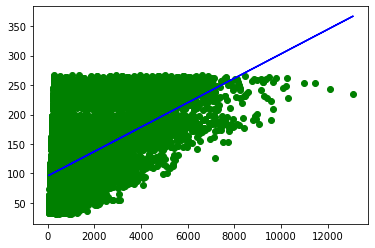

In [59]:
import matplotlib.pyplot as plt
plt.scatter(delta["Item_Outlet_Sales"],delta["Item_MRP"],color = 'green')
plt.plot(delta['Item_Outlet_Sales'],model_pred_Item_MRP, color= 'b')
plt.show()